    # Energy Dataset.

## 1. Importing the required libraries for EDA

Below are the libraries that are used IN THE MODEL

In [4174]:
import pandas as pd                                                           #Dataframe
import numpy as np                                                            #Dataframe
import matplotlib.pyplot as plt                                               #Visualisation
import plotly.express as px                                                   #Visualization
import seaborn as sns                                                         #Visualization
import plotly.graph_objects as go                                             #Visualisation
from plotly.subplots import make_subplots                                     #Visualisation
from sklearn.model_selection import train_test_split, GridSearchCV            #Model
from sklearn.preprocessing import StandardScaler                              #Model
from sklearn.metrics import mean_squared_error, r2_score                      #Model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Model
from sklearn.linear_model import LinearRegression                             #Model
from sklearn import preprocessing                                             #Model
import statsmodels.api as sm                                                  #Model
import warnings
warnings.filterwarnings('ignore')

# Loading the data into the data frame.

In [4175]:
df = pd.read_csv("ENERGY_data.csv")
energy_data = df
# To display the top 42 rows
energy_data.head(45)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.939110,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.939110,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.939110,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.939110,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,"6,52,230",33.939110,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,"6,52,230",33.939110,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,"6,52,230",33.939110,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,"6,52,230",33.939110,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,"6,52,230",33.939110,67.709953


In [4176]:
#Checking null values and types of the parameters
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [4177]:
#Checking descriptive analytics of the numerical parameters
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


# Renaming columns and dropping columns

In [4178]:
#Adding "_" lower case to headers to easy hanlde
energy_data.columns = energy_data.columns.str.lower().str.replace(" ", "_")

In [4179]:
#Renaming headers to easu handle titles
energy_data = energy_data.rename({'entity':'country','access_to_electricity_(%_of_population)':'access_electricity(%)','access_to_clean_fuels_for_cooking':'access_cleaning_flues_cooking','renewable-electricity-generating-capacity-per-capita':'renewal_electricity_capacity(per person)','financial_flows_to_developing_countries_(us_$)':'financial_flows($)','renewable_energy_share_in_the_total_final_energy_consumption_(%)':'renewable_energy(%)','electricity_from_fossil_fuels_(twh)':'electricity_fossil_fuels(twh)','electricity_from_nuclear_(twh)':'electricity_nuclear','electricity_from_renewables_(twh)':'electricity_from_renewals','low-carbon_electricity_(%_electricity)':'electricity_low_carbon(%)','primary_energy_consumption_per_capita_(kwh/person)':'primary_energy_consumption(kwh/person)','energy_intensity_level_of_primary_energy_(mj/$2017_ppp_gdp)':'primary_energy_intensity','value_co2_emissions_kt_by_country':'co2_emissions','renewables_(%_equivalent_primary_energy)':'renewables','density\\n(p/km2)':'density','land_area(km2)':'land_area'},axis = 1)

In [4180]:
energy_data[['land_area','density']]

,land_area,density
0,"6,52,230",60
1,"6,52,230",60
2,"6,52,230",60
3,"6,52,230",60
4,"6,52,230",60
...,...,...
3644,"3,90,757",38
3645,"3,90,757",38
3646,"3,90,757",38
3647,"3,90,757",38


In [4181]:
energy_data['land_area'] = energy_data['land_area'].str.replace(',', '')
energy_data['land_area'] = pd.to_numeric(energy_data['land_area'])

In [4182]:
energy_data['density'] = energy_data['density'].str.replace(',', '')
energy_data['density'] = pd.to_numeric(energy_data['density'])

In [4183]:
#Checking all the parameters have the correct type of data
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   country                                   3649 non-null   object 
 1   year                                      3649 non-null   int64  
 2   access_electricity(%)                     3639 non-null   float64
 3   access_cleaning_flues_cooking             3480 non-null   float64
 4   renewal_electricity_capacity(per person)  2718 non-null   float64
 5   financial_flows($)                        1560 non-null   float64
 6   renewable_energy(%)                       3455 non-null   float64
 7   electricity_fossil_fuels(twh)             3628 non-null   float64
 8   electricity_nuclear                       3523 non-null   float64
 9   electricity_from_renewals                 3628 non-null   float64
 10  electricity_low_carbon(%)           

In [4184]:
#Checking if all the countries have 21 years
count_country = energy_data['country'].value_counts()
count_country[count_country != 21]

country
Serbia           14
Montenegro       14
South Sudan       8
French Guiana     1
Name: count, dtype: int64

In [4185]:
#Creating a subset of Serbia/Montenegro COuntries
serbia = energy_data[energy_data['country'] == 'Serbia']
montenegro = energy_data[energy_data['country'] == 'Montenegro']

In [4186]:
#Drop the whole Country "South Sudan" and "French Guinea" as they don't have enough data
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'French Guiana'].index)
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'South Sudan'].index)
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'Serbia'].index)
energy_data = energy_data.drop(energy_data[energy_data['country'] == 'Montenegro'].index)

In [4187]:
#Adding the 6 years missing to both countries 
years = [0,1,2,3,4,5,6]
new_row = [0,1,2,3,4,5,6]
for i in years:
    new_row[i] = {'country':'Serbia',
           'year':i+2000,
           'access_electricity':0, 
           'access_cooking_fuels':0, 
           'renewal_electricity_capacity':0,
           'financial_flows':0,
           'renewable_energy_share':0,
           'electricity_fossil_fuels':0,
           'electricity_nuclear':0,
           'electricity_renewals':0,
           'electricity_low_carbon':0,
           'primary_energy_consumption':0,
           'energy_level':0,
           'co2_emissions':0,
           'renewals':0,
           'gdp_growth':0,
           'gdp_per_capita':0,
           'density':0,
           'latitude':0,
           'longitude':0,
           'gdp_growth':0}
    serbia.loc[i] = new_row[i]

for i in years:
    new_row[i] = {'country':'Montenegro',
           'year':i+2000,
           'access_electricity':0, 
           'access_cooking_fuels':0, 
           'renewal_electricity_capacity':0,
           'financial_flows':0,
           'renewable_energy_share':0,
           'electricity_fossil_fuels':0,
           'electricity_nuclear':0,
           'electricity_renewals':0,
           'electricity_low_carbon':0,
           'primary_energy_consumption':0,
           'energy_level':0,
           'co2_emissions':0,
           'renewals':0,
           'gdp_growth':0,
           'gdp_per_capita':0,
           'density':0,
           'latitude':0,
           'longitude':0,
           'gdp_growth':0}
    montenegro.loc[i] = new_row[i]

In [4188]:
#Sorting and reseting the indexes for both countries
serbia = serbia.sort_index()
serbia = serbia.reset_index(drop=True)

montenegro = montenegro.sort_index()
montenegro = montenegro.reset_index(drop=True)

In [4189]:
#Adding back both countries to Main dataset with new Year
energy_data = pd.concat([serbia,energy_data.loc[:]])
energy_data = energy_data.reset_index(drop=True)

energy_data = pd.concat([montenegro,energy_data.loc[:]])
energy_data = energy_data.reset_index(drop=True)

In [4190]:
#Checking again that all the countries have 21 years
count_country = energy_data['country'].value_counts()
count_country[count_country != 21]

Series([], Name: count, dtype: int64)

In [4191]:
energy_data[energy_data['country']=='United States']

,country,year,access_electricity(%),access_cleaning_flues_cooking,renewal_electricity_capacity(per person),financial_flows($),renewable_energy(%),electricity_fossil_fuels(twh),electricity_nuclear,electricity_from_renewals,...,primary_energy_consumption(kwh/person),primary_energy_intensity,co2_emissions,renewables,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude
3507,United States,2000,100.0,100.0,NaN,NaN,5.43,2697.28,753.89,350.93,...,93999.860,6.73,5775810.000,4.027357,4.127484,36334.90878,36.0,9833517.0,37.09024,-95.712891
3508,United States,2001,100.0,100.0,NaN,NaN,4.68,2678.68,768.83,280.06,...,90772.180,6.54,5748260.000,3.421371,0.998341,37133.24281,36.0,9833517.0,37.09024,-95.712891
3509,United States,2002,100.0,100.0,NaN,NaN,4.84,2727.83,780.06,336.34,...,91201.060,6.50,5593029.785,4.015507,1.741695,38023.16111,36.0,9833517.0,37.09024,-95.712891
3510,United States,2003,100.0,100.0,NaN,NaN,5.33,2756.03,763.73,349.18,...,90619.110,6.33,5658990.234,4.180040,2.861211,39496.48588,36.0,9833517.0,37.09024,-95.712891
3511,United States,2004,100.0,100.0,NaN,NaN,5.48,2818.28,788.53,345.14,...,91504.484,6.22,5738290.039,4.101511,3.798891,41712.80107,36.0,9833517.0,37.09024,-95.712891
3512,United States,2005,100.0,100.0,NaN,NaN,5.84,2899.96,781.99,353.04,...,90654.530,6.04,5753490.234,4.219231,3.513214,44114.74778,36.0,9833517.0,37.09024,-95.712891
3513,United States,2006,100.0,100.0,NaN,NaN,6.40,2878.56,787.22,381.16,...,89067.040,5.82,5653080.078,4.678861,2.854972,46298.73144,36.0,9833517.0,37.09024,-95.712891
3514,United States,2007,100.0,100.0,NaN,NaN,6.30,2988.24,806.42,347.91,...,89395.140,5.81,5736319.824,4.373009,1.876171,47975.96770,36.0,9833517.0,37.09024,-95.712891
3515,United States,2008,100.0,100.0,NaN,NaN,6.85,2924.21,806.21,377.11,...,86378.650,5.67,5558379.883,5.004550,-0.136580,48382.55845,36.0,9833517.0,37.09024,-95.712891
3516,United States,2009,100.0,100.0,NaN,NaN,7.35,2725.41,798.85,415.56,...,81376.180,5.53,5156430.176,5.800006,-2.536757,47099.98047,36.0,9833517.0,37.09024,-95.712891


# Data imputation.

In [4192]:
null_values = (energy_data.isnull().sum() / len(energy_data))*100
null_values

country                                      0.000000
year                                         0.000000
access_electricity(%)                        0.629447
access_cleaning_flues_cooking                4.980843
renewal_electricity_capacity(per person)    25.862069
financial_flows($)                          57.471264
renewable_energy(%)                          5.665025
electricity_fossil_fuels(twh)                0.957854
electricity_nuclear                          3.448276
electricity_from_renewals                    0.957854
electricity_low_carbon(%)                    1.532567
primary_energy_consumption(kwh/person)       0.383142
primary_energy_intensity                     5.883963
co2_emissions                               11.658456
renewables                                  58.620690
gdp_growth                                   8.511221
gdp_per_capita                               7.553366
density                                      0.000000
land_area                   

## Access to Electricity

In [4193]:
energy_data['access_electricity(%)'] = energy_data['access_electricity(%)'].fillna(0)

## Access cleaning fuels

In [4194]:
#access_cleaning_flues_cookin had 169 missing values distributed in 8 Countries, and it happens either the first years or the whole 20 years, means it is possible those countries really don't have access to cleaning fuels cooking. Then, I will replace those value with 0 
null_cooking = energy_data[energy_data['access_cleaning_flues_cooking'].isnull() == True]
null_cooking['country'].unique()
energy_data['access_cleaning_flues_cooking'] = energy_data['access_cleaning_flues_cooking'].fillna(0)

## Renewal Electricity Capacity

In [4195]:
energy_data = energy_data.drop(['renewal_electricity_capacity(per person)','financial_flows($)'], axis=1)

## Renewable Energy (%)

In [4196]:
#I will fill with 0 the countries  of Montenegro, Serbia and Albania before 2020 as they were not declared independent nations in the past
energy_data[(energy_data['country'] =='Montenegro') & (energy_data['renewable_energy(%)'].isnull()==True) & (energy_data['year'] != 2020)] = energy_data[(energy_data['country'] =='Montenegro') & (energy_data['renewable_energy(%)'].isnull() ==True) & (energy_data['year'] != 2020)].fillna(0)
energy_data[(energy_data['country'] =='Serbia') & (energy_data['renewable_energy(%)'].isnull()==True) & (energy_data['year'] != 2020)] = energy_data[(energy_data['country'] =='Serbia') & (energy_data['renewable_energy(%)'].isnull() ==True) & (energy_data['year'] != 2020)].fillna(0)
energy_data[(energy_data['country'] =='Albania') & (energy_data['renewable_energy(%)'].isnull()==True) & (energy_data['year'] != 2020)] = energy_data[(energy_data['country'] =='Albania') & (energy_data['renewable_energy(%)'].isnull() ==True) & (energy_data['year'] != 2020)].fillna(0)

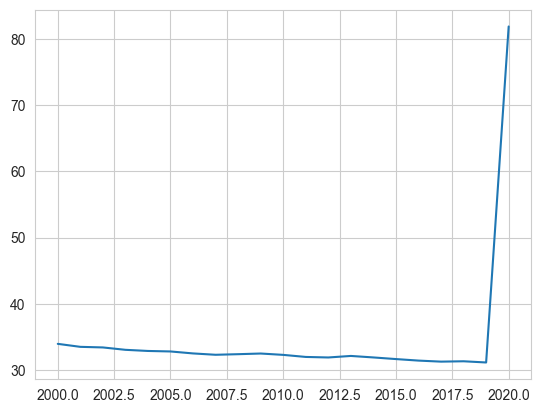

In [4197]:
#It can be seen the overall trend is to decrease until 2019, 
dates = energy_data['year'].unique()
renewal_energy = energy_data[['year','renewable_energy(%)']].groupby(by='year').mean()
# Create a line plot
plt.plot(dates, renewal_energy)
# Show the plot
plt.show()

In [4198]:
#We use the extrapolating method to fill the 2020 years
for country in energy_data['country'].unique():
       energy_data['renewable_energy(%)'][energy_data['country']==country] = energy_data['renewable_energy(%)'][energy_data['country']==country].fillna(energy_data['renewable_energy(%)'][energy_data['country']==country].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

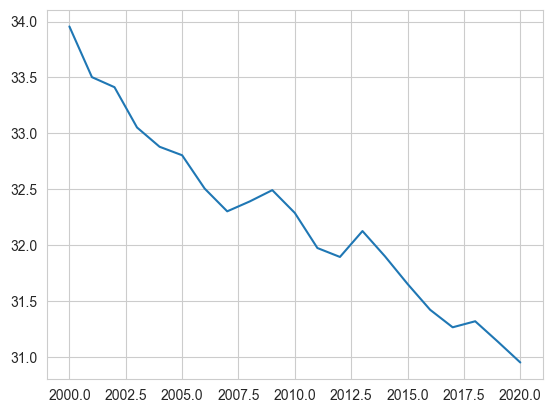

In [4199]:
#It can be seen the overall trend is to decrease until 2019, 
dates = energy_data['year'].unique()
renewal_energy = energy_data[['year','renewable_energy(%)']].groupby(by='year').mean()
# Create a line plot
plt.plot(dates, renewal_energy)
# Show the plot
plt.show()

## Electricity fossil fuels

In [4200]:
energy_data['electricity_fossil_fuels(twh)'][energy_data['electricity_fossil_fuels(twh)'].isnull()==True] = 0

## Electricity Low carbon

In [4201]:
energy_data['electricity_low_carbon(%)'][energy_data['electricity_low_carbon(%)'].isnull()==True] = 0

## Primary Energy Intensity

In [4202]:
#We use the extrapolating method to fill the 2020 years
for country in energy_data['country'].unique():
       energy_data['primary_energy_intensity'][energy_data['country']==country] = energy_data['primary_energy_intensity'][energy_data['country']==country].fillna(energy_data['primary_energy_intensity'][energy_data['country']==country].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

energy_data['primary_energy_intensity'][energy_data['primary_energy_intensity'].isnull()==True] = 0

## Electricity Nuclear

In [4203]:
energy_data['electricity_nuclear'][energy_data['electricity_nuclear'].isnull()==True] = 0

## CO2 emissions

In [4204]:
for country in energy_data['country'].unique():
       energy_data['co2_emissions'][energy_data['country']==country] = energy_data['co2_emissions'][energy_data['country']==country].fillna(energy_data['co2_emissions'][energy_data['country']==country].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
       
energy_data['co2_emissions'][energy_data['co2_emissions'].isnull()==True] = 0

## GDP per capita

In [4205]:
for country in energy_data['country'].unique():
       energy_data['gdp_per_capita'][energy_data['country']==country] = energy_data['gdp_per_capita'][energy_data['country']==country].fillna(energy_data['gdp_per_capita'][energy_data['country']==country].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
       
energy_data['gdp_per_capita'][energy_data['gdp_per_capita'].isnull()==True] = 0

## Electricity from renewals

In [4206]:
energy_data['electricity_from_renewals'][energy_data['electricity_from_renewals'].isnull()==True] = 0

## GDP growth

In [4207]:
energy_data['gdp_growth'].fillna(method='bfill', inplace = True)

In [4208]:
null_values = (energy_data.isnull().sum() / len(energy_data))*100
null_values

country                                   0.0
year                                      0.0
access_electricity(%)                     0.0
access_cleaning_flues_cooking             0.0
renewable_energy(%)                       0.0
electricity_fossil_fuels(twh)             0.0
electricity_nuclear                       0.0
electricity_from_renewals                 0.0
electricity_low_carbon(%)                 0.0
primary_energy_consumption(kwh/person)    0.0
primary_energy_intensity                  0.0
co2_emissions                             0.0
gdp_growth                                0.0
gdp_per_capita                            0.0
density                                   0.0
land_area                                 0.0
latitude                                  0.0
longitude                                 0.0
dtype: float64

# FEATURE ENGINEERING

In [4209]:
target = 'primary_energy_consumption(kwh/person)'
features = ['renewable_energy(%)','density','gdp_per_capita']

In [4210]:
target_co2 = 'co2_emissions'
features_co2 = ['electricity_fossil_fuels(twh)','electricity_from_renewals']

## China subset to predict (Energy & CO2)

In [4211]:
#Energy
x_unseen_china = energy_data[['year','renewable_energy(%)','density','gdp_per_capita']][(energy_data['year']>= 2000) & (energy_data['year']<= 2020) & (energy_data['country']== 'China')]
y_unseen_china = energy_data[[target]][(energy_data['year']>= 2000) & (energy_data['year']<= 2020) & (energy_data['country']== 'China')]
y_unseen_china.reset_index(inplace=True)
y_unseen_china.drop(['index'],axis=1, inplace=True)
y_unseen_train= y_unseen_china

In [4212]:
#Energy
x_unseen_china.loc[756,'year'] = '2000'
x_unseen_china.loc[757,'year'] = '2001'
x_unseen_china.loc[758,'year'] = '2002'
x_unseen_china.loc[759,'year'] = '2003'
x_unseen_china.loc[760,'year'] = '2004'
x_unseen_china.loc[761,'year'] = '2005'
x_unseen_china.loc[762,'year'] = '2006'
x_unseen_china.loc[763,'year'] = '2007'
x_unseen_china.loc[764,'year'] = '2008'
x_unseen_china.loc[765,'year'] = '2009'

x_unseen_china.loc[766,'year'] = '2010'
x_unseen_china.loc[767,'year'] = '2011'
x_unseen_china.loc[768,'year'] = '2012'
x_unseen_china.loc[769,'year'] = '2013'
x_unseen_china.loc[770,'year'] = '2014'
x_unseen_china.loc[771,'year'] = '2015'
x_unseen_china.loc[772,'year'] = '2016'
x_unseen_china.loc[773,'year'] = '2017'
x_unseen_china.loc[774,'year'] = '2018'
x_unseen_china.loc[775,'year'] = '2019'

x_unseen_china.loc[776,'year'] = '2020'
x_unseen_china.loc[777,'year'] = '2021'
x_unseen_china.loc[778,'year'] = '2022'
x_unseen_china.loc[779,'year'] = '2023'
x_unseen_china.loc[780,'year'] = '2024'
x_unseen_china.loc[781,'year'] = '2025'

In [4213]:
#Energy
x_unseen_china.reset_index(inplace=True)
x_unseen_china.drop(['index'],axis=1, inplace=True)

In [4214]:
#Energy
x_unseen_china['renewable_energy(%)'] = x_unseen_china['renewable_energy(%)'].fillna(x_unseen_china['renewable_energy(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#density
x_unseen_china['density'] = x_unseen_china['density'].fillna(x_unseen_china['density'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#gdp_per_capita
x_unseen_china['gdp_per_capita'] = x_unseen_china['gdp_per_capita'].fillna(x_unseen_china['gdp_per_capita'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

In [4215]:
#Energy
x_unseen_china.drop(['year'],axis=1,inplace = True)

In [4216]:
#Energy
scaler = StandardScaler()
x_unseen_china = scaler.fit_transform(x_unseen_china)
x_unseen_china = pd.DataFrame(x_unseen_china)

In [4217]:
#Energy
x_unseen_china_train = x_unseen_china.iloc[0:21]

In [4218]:
#Energy
x_unseen_china_test = x_unseen_china.iloc[21:]

In [4219]:
#CO2
x_unseen_china_co2 = energy_data[['year','electricity_fossil_fuels(twh)','electricity_from_renewals']][(energy_data['year']>= 2000) & (energy_data['year']<= 2020) & (energy_data['country']== 'China')]
y_unseen_china_co2 = energy_data[[target_co2]][(energy_data['year']>= 2000) & (energy_data['year']<= 2020) & (energy_data['country']== 'China')]
y_unseen_china_co2.reset_index(inplace=True)
y_unseen_china_co2.drop(['index'],axis=1, inplace=True)
y_unseen_train_china_co2= y_unseen_china_co2

In [4220]:
#CO2 Emissions
x_unseen_china_co2.loc[756,'year'] = '2000'
x_unseen_china_co2.loc[757,'year'] = '2001'
x_unseen_china_co2.loc[758,'year'] = '2002'
x_unseen_china_co2.loc[759,'year'] = '2003'
x_unseen_china_co2.loc[760,'year'] = '2004'
x_unseen_china_co2.loc[761,'year'] = '2005'
x_unseen_china_co2.loc[762,'year'] = '2006'
x_unseen_china_co2.loc[763,'year'] = '2007'
x_unseen_china_co2.loc[764,'year'] = '2008'
x_unseen_china_co2.loc[765,'year'] = '2009'

x_unseen_china_co2.loc[766,'year'] = '2010'
x_unseen_china_co2.loc[767,'year'] = '2011'
x_unseen_china_co2.loc[768,'year'] = '2012'
x_unseen_china_co2.loc[769,'year'] = '2013'
x_unseen_china_co2.loc[770,'year'] = '2014'
x_unseen_china_co2.loc[771,'year'] = '2015'
x_unseen_china_co2.loc[772,'year'] = '2016'
x_unseen_china_co2.loc[773,'year'] = '2017'
x_unseen_china_co2.loc[774,'year'] = '2018'
x_unseen_china_co2.loc[775,'year'] = '2019'

x_unseen_china_co2.loc[776,'year'] = '2020'
x_unseen_china_co2.loc[777,'year'] = '2021'
x_unseen_china_co2.loc[778,'year'] = '2022'
x_unseen_china_co2.loc[779,'year'] = '2023'
x_unseen_china_co2.loc[780,'year'] = '2024'
x_unseen_china_co2.loc[781,'year'] = '2025'

In [4221]:
#CO2 emissions
x_unseen_china_co2.reset_index(inplace=True)
x_unseen_china_co2.drop(['index'],axis=1, inplace=True)

In [4222]:
#CO2 Emissions

#Access to Electricity
#x_unseen_china_co2['access_electricity(%)'] = x_unseen_china_co2['access_electricity(%)'].fillna(x_unseen_china_co2['access_electricity(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Access Cleaning fuel cooking
#x_unseen_china_co2['access_cleaning_flues_cooking'] = x_unseen_china_co2['access_cleaning_flues_cooking'].fillna(x_unseen_china_co2['access_cleaning_flues_cooking'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
#x_unseen_china_co2['renewable_energy(%)'] = x_unseen_china_co2['renewable_energy(%)'].fillna(x_unseen_china_co2['renewable_energy(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
x_unseen_china_co2['electricity_fossil_fuels(twh)'] = x_unseen_china_co2['electricity_fossil_fuels(twh)'].fillna(x_unseen_china_co2['electricity_fossil_fuels(twh)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#electricity_nuclear
#x_unseen_china_co2['electricity_nuclear'] = x_unseen_china_co2['electricity_nuclear'].fillna(x_unseen_china_co2['electricity_nuclear'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
x_unseen_china_co2['electricity_from_renewals'] = x_unseen_china_co2['electricity_from_renewals'].fillna(x_unseen_china_co2['electricity_from_renewals'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#eelectricity_low_carbon(%)
#x_unseen_china_co2['electricity_low_carbon(%)'] = x_unseen_china_co2['electricity_low_carbon(%)'].fillna(x_unseen_china_co2['electricity_low_carbon(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
#x_unseen_china_co2['primary_energy_intensity'] = x_unseen_china_co2['primary_energy_intensity'].fillna(x_unseen_china_co2['primary_energy_intensity'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Primary energy consumption
#x_unseen_china_co2['primary_energy_consumption(kwh/person)'] = x_unseen_china_co2['primary_energy_consumption(kwh/person)'].fillna(x_unseen_china_co2['primary_energy_consumption(kwh/person)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#co2_emissions
#x_unseen_china_co2['co2_emissions'] = x_unseen_china_co2['co2_emissions'].fillna(x_unseen_china_co2['co2_emissions'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#gdp_growth
#x_unseen_china_co2['gdp_growth'] = x_unseen_china_co2['gdp_growth'].fillna(x_unseen_china_co2['gdp_growth'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#density
#x_unseen_china_co2['density'] = x_unseen_china_co2['density'].fillna(x_unseen_china_co2['density'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#gdp_per_capita
#x_unseen_china_co2['gdp_per_capita'] = x_unseen_china_co2['gdp_per_capita'].fillna(x_unseen_china_co2['gdp_per_capita'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))


In [4223]:
#CO2 Emissions
x_unseen_china_co2.drop(['year'],axis=1,inplace = True)

In [4224]:
#CO2 Emissions
scaler = StandardScaler()
x_unseen_china_co2 = scaler.fit_transform(x_unseen_china_co2)
x_unseen_china_co2 = pd.DataFrame(x_unseen_china_co2)

In [4225]:
#CO2
x_unseen_china_co2_train = x_unseen_china_co2.iloc[0:21]

In [4226]:
#CO2
x_unseen_china_co2_test = x_unseen_china_co2.iloc[21:]

## Create Subset United States

In [4227]:
x_unseen_us = energy_data[['year','renewable_energy(%)','density','gdp_per_capita']][(energy_data['year']>= 2000) & (energy_data['year']<= 2020) & (energy_data['country']== 'United States')]
y_unseen_us = energy_data[['primary_energy_consumption(kwh/person)']][(energy_data['year']>= 2000) & (energy_data['year']<= 2020) & (energy_data['country']== 'United States')]
y_unseen_us.reset_index(inplace=True)
y_unseen_us.drop(['index'],axis=1, inplace=True)
y_unseen_train_us = y_unseen_us

In [4228]:
x_unseen_us

,year,renewable_energy(%),density,gdp_per_capita
3507,2000,5.43,36.0,36334.90878
3508,2001,4.68,36.0,37133.24281
3509,2002,4.84,36.0,38023.16111
3510,2003,5.33,36.0,39496.48588
3511,2004,5.48,36.0,41712.80107
3512,2005,5.84,36.0,44114.74778
3513,2006,6.40,36.0,46298.73144
3514,2007,6.30,36.0,47975.96770
3515,2008,6.85,36.0,48382.55845
3516,2009,7.35,36.0,47099.98047


In [4229]:
x_unseen_us.loc[3507,'year'] = '2000'
x_unseen_us.loc[3508,'year'] = '2001'
x_unseen_us.loc[3509,'year'] = '2002'
x_unseen_us.loc[3510,'year'] = '2003'
x_unseen_us.loc[3511,'year'] = '2004'
x_unseen_us.loc[3512,'year'] = '2005'
x_unseen_us.loc[3513,'year'] = '2006'
x_unseen_us.loc[3514,'year'] = '2007'
x_unseen_us.loc[3515,'year'] = '2008'
x_unseen_us.loc[3516,'year'] = '2009'

x_unseen_us.loc[3517,'year'] = '2010'
x_unseen_us.loc[3518,'year'] = '2011'
x_unseen_us.loc[3519,'year'] = '2012'
x_unseen_us.loc[3520,'year'] = '2013'
x_unseen_us.loc[3521,'year'] = '2014'
x_unseen_us.loc[3522,'year'] = '2015'
x_unseen_us.loc[3523,'year'] = '2016'
x_unseen_us.loc[3524,'year'] = '2017'
x_unseen_us.loc[3525,'year'] = '2018'
x_unseen_us.loc[3526,'year'] = '2019'
x_unseen_us.loc[3527,'year'] = '2020'
x_unseen_us.loc[3528,'year'] = '2021'
x_unseen_us.loc[3529,'year'] = '2022'
x_unseen_us.loc[3530,'year'] = '2023'
x_unseen_us.loc[3531,'year'] = '2024'
x_unseen_us.loc[3532,'year'] = '2025'

In [4230]:
x_unseen_us.reset_index(inplace=True)
x_unseen_us.drop(['index'],axis=1, inplace=True)

In [4231]:
#Access to Electricity
#x_unseen_us['access_electricity(%)'] = x_unseen_us['access_electricity(%)'].fillna(x_unseen_us['access_electricity(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Access Cleaning fuel cooking
#x_unseen_us['access_cleaning_flues_cooking'] = x_unseen_us['access_cleaning_flues_cooking'].fillna(x_unseen_us['access_cleaning_flues_cooking'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
x_unseen_us['renewable_energy(%)'] = x_unseen_us['renewable_energy(%)'].fillna(x_unseen_us['renewable_energy(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
#x_unseen_us['electricity_fossil_fuels(twh)'] = x_unseen_us['electricity_fossil_fuels(twh)'].fillna(x_unseen_us['electricity_fossil_fuels(twh)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#electricity_nuclear
#x_unseen_us['electricity_nuclear'] = x_unseen_us['electricity_nuclear'].fillna(x_unseen_us['electricity_nuclear'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
#x_unseen_us['electricity_from_renewals'] = x_unseen_us['electricity_from_renewals'].fillna(x_unseen_us['electricity_from_renewals'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#eelectricity_low_carbon(%)
#x_unseen_us['electricity_low_carbon(%)'] = x_unseen_us['electricity_low_carbon(%)'].fillna(x_unseen_us['electricity_low_carbon(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
#x_unseen_us['primary_energy_intensity'] = x_unseen_us['primary_energy_intensity'].fillna(x_unseen_us['primary_energy_intensity'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#co2_emissions
#x_unseen_us['co2_emissions'] = x_unseen_us['co2_emissions'].fillna(x_unseen_us['co2_emissions'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#gdp_growth
#x_unseen_us['gdp_growth'] = x_unseen_us['gdp_growth'].fillna(x_unseen_us['gdp_growth'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#density
x_unseen_us['density'] = x_unseen_us['density'].fillna(x_unseen_us['density'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#gdp_per_capita
x_unseen_us['gdp_per_capita'] = x_unseen_us['gdp_per_capita'].fillna(x_unseen_us['gdp_per_capita'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

In [4232]:
x_unseen_us.drop(['year'], axis=1, inplace=True)

In [4233]:
x_unseen_us

,renewable_energy(%),density,gdp_per_capita
0,5.43,36.0,36334.90878
1,4.68,36.0,37133.24281
2,4.84,36.0,38023.16111
3,5.33,36.0,39496.48588
4,5.48,36.0,41712.80107
5,5.84,36.0,44114.74778
6,6.40,36.0,46298.73144
7,6.30,36.0,47975.96770
8,6.85,36.0,48382.55845
9,7.35,36.0,47099.98047


In [4234]:
scaler = StandardScaler()
x_unseen_us = scaler.fit_transform(x_unseen_us)
x_unseen_us = pd.DataFrame(x_unseen_us)

In [4235]:
x_unseen_us

,0,1,2
0,-1.278362,0.0,-1.798705
1,-1.598281,0.0,-1.705269
2,-1.530031,0.0,-1.601115
3,-1.321018,0.0,-1.428679
4,-1.257034,0.0,-1.169286
5,-1.103473,0.0,-0.888166
6,-0.864601,0.0,-0.632556
7,-0.907256,0.0,-0.436255
8,-0.672649,0.0,-0.388668
9,-0.459370,0.0,-0.538779


In [4236]:
x_unseen_us_train = x_unseen_us.iloc[0:21]

In [4237]:
x_unseen_us_test = x_unseen_us.iloc[21:]

In [4238]:
x_unseen_us_test

,0,1,2
21,1.106098,0.0,1.194251
22,1.234065,0.0,0.996915
23,1.362033,0.0,0.799578
24,1.490000,0.0,0.602242
25,1.617968,0.0,0.404905


In [4239]:
x_unseen_us_train

,0,1,2
0,-1.278362,0.0,-1.798705
1,-1.598281,0.0,-1.705269
2,-1.530031,0.0,-1.601115
3,-1.321018,0.0,-1.428679
4,-1.257034,0.0,-1.169286
5,-1.103473,0.0,-0.888166
6,-0.864601,0.0,-0.632556
7,-0.907256,0.0,-0.436255
8,-0.672649,0.0,-0.388668
9,-0.459370,0.0,-0.538779


In [4240]:
y_unseen_us

,primary_energy_consumption(kwh/person)
0,93999.860
1,90772.180
2,91201.060
3,90619.110
4,91504.484
5,90654.530
6,89067.040
7,89395.140
8,86378.650
9,81376.180


In [4241]:
#CO2
x_unseen_us_co2 = energy_data[['year', 'electricity_fossil_fuels(twh)', 'electricity_from_renewals']][
       (energy_data['year'] >= 2000) & (energy_data['year'] <= 2020) & (energy_data['country'] == 'United States')]
y_unseen_us_co2 = energy_data[[target_co2]][
       (energy_data['year'] >= 2000) & (energy_data['year'] <= 2020) & (energy_data['country'] == 'United States')]

In [4242]:
x_unseen_us_co2 

,year,electricity_fossil_fuels(twh),electricity_from_renewals
3507,2000,2697.28,350.93
3508,2001,2678.68,280.06
3509,2002,2727.83,336.34
3510,2003,2756.03,349.18
3511,2004,2818.28,345.14
3512,2005,2899.96,353.04
3513,2006,2878.56,381.16
3514,2007,2988.24,347.91
3515,2008,2924.21,377.11
3516,2009,2725.41,415.56


In [4243]:
y_unseen_us_co2.reset_index(inplace=True)

In [4244]:
y_unseen_us_co2.drop(['index'], axis=1, inplace=True)

In [4245]:
y_unseen_train_us_co2 = y_unseen_us_co2

In [4246]:
#CO2 Emissions
x_unseen_us_co2.loc[3507, 'year'] = '2000'
x_unseen_us_co2.loc[3508, 'year'] = '2001'
x_unseen_us_co2.loc[3509, 'year'] = '2002'
x_unseen_us_co2.loc[3510, 'year'] = '2003'
x_unseen_us_co2.loc[3511, 'year'] = '2004'
x_unseen_us_co2.loc[3512, 'year'] = '2005'
x_unseen_us_co2.loc[3513, 'year'] = '2006'
x_unseen_us_co2.loc[3514, 'year'] = '2007'
x_unseen_us_co2.loc[3515, 'year'] = '2008'
x_unseen_us_co2.loc[3516, 'year'] = '2009'

x_unseen_us_co2.loc[3517, 'year'] = '2010'
x_unseen_us_co2.loc[3518, 'year'] = '2011'
x_unseen_us_co2.loc[3519, 'year'] = '2012'
x_unseen_us_co2.loc[3520, 'year'] = '2013'
x_unseen_us_co2.loc[3521, 'year'] = '2014'
x_unseen_us_co2.loc[3522, 'year'] = '2015'
x_unseen_us_co2.loc[3523, 'year'] = '2016'
x_unseen_us_co2.loc[3524, 'year'] = '2017'
x_unseen_us_co2.loc[3525, 'year'] = '2018'
x_unseen_us_co2.loc[3526, 'year'] = '2019'

x_unseen_us_co2.loc[3527, 'year'] = '2020'
x_unseen_us_co2.loc[3528, 'year'] = '2021'
x_unseen_us_co2.loc[3529, 'year'] = '2022'
x_unseen_us_co2.loc[3530, 'year'] = '2023'
x_unseen_us_co2.loc[3531, 'year'] = '2024'
x_unseen_us_co2.loc[3532, 'year'] = '2025'

In [4247]:
#CO2 emissions
x_unseen_us_co2.reset_index(inplace=True)
x_unseen_us_co2.drop(['index'], axis=1, inplace=True)

In [4248]:
#CO2 Emissions

#Access to Electricity
#x_unseen_us_co2['access_electricity(%)'] = x_unseen_us_co2['access_electricity(%)'].fillna(x_unseen_us_co2['access_electricity(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Access Cleaning fuel cooking
#x_unseen_us_co2['access_cleaning_flues_cooking'] = x_unseen_us_co2['access_cleaning_flues_cooking'].fillna(x_unseen_us_co2['access_cleaning_flues_cooking'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
#x_unseen_us_co2['renewable_energy(%)'] = x_unseen_us_co2['renewable_energy(%)'].fillna(x_unseen_us_co2['renewable_energy(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
x_unseen_us_co2['electricity_fossil_fuels(twh)'] = x_unseen_us_co2['electricity_fossil_fuels(twh)'].fillna(
       x_unseen_us_co2['electricity_fossil_fuels(twh)'].interpolate(method="slinear", fill_value="extrapolate",
                                                                    limit_direction="forward"))

#electricity_nuclear
#x_unseen_us_co2['electricity_nuclear'] = x_unseen_us_co2['electricity_nuclear'].fillna(x_unseen_us_co2['electricity_nuclear'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
x_unseen_us_co2['electricity_from_renewals'] = x_unseen_us_co2['electricity_from_renewals'].fillna(
       x_unseen_us_co2['electricity_from_renewals'].interpolate(method="slinear", fill_value="extrapolate",
                                                                limit_direction="forward"))
#electricity_low_carbon(%)
#x_unseen_us_co2['electricity_low_carbon(%)'] = x_unseen_us_co2['electricity_low_carbon(%)'].fillna(x_unseen_us_co2['electricity_low_carbon(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
#x_unseen_us_co2['primary_energy_intensity'] = x_unseen_us_co2['primary_energy_intensity'].fillna(x_unseen_us_co2['primary_energy_intensity'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Primary energy consumption
#x_unseen_us_co2['primary_energy_consumption(kwh/person)'] = x_unseen_us_co2['primary_energy_consumption(kwh/person)'].fillna(x_unseen_us_co2['primary_energy_consumption(kwh/person)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#co2_emissions
#x_unseen_us_co2['co2_emissions'] = x_unseen_us_co2['co2_emissions'].fillna(x_unseen_us_co2['co2_emissions'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#gdp_growth
#x_unseen_us_co2['gdp_growth'] = x_unseen_us_co2['gdp_growth'].fillna(x_unseen_us_co2['gdp_growth'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#density
#x_unseen_us_co2['density'] = x_unseen_us_co2['density'].fillna(x_unseen_us_co2['density'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#gdp_per_capita
#x_unseen_us_co2['gdp_per_capita'] = x_unseen_us_co2['gdp_per_capita'].fillna(x_unseen_us_co2['gdp_per_capita'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

In [4249]:
#CO2 Emissions
x_unseen_us_co2.drop(['year'], axis=1, inplace=True)

In [4250]:
#CO2 Emissions
scaler = StandardScaler()
x_unseen_us_co2 = scaler.fit_transform(x_unseen_us_co2)
x_unseen_us_co2 = pd.DataFrame(x_unseen_us_co2)

In [4251]:
x_unseen_us_co2

,0,1
0,0.298306,-0.941200
1,0.244122,-1.224277
2,0.387301,-0.999477
3,0.469451,-0.948190
4,0.650792,-0.964327
5,0.888734,-0.932772
6,0.826394,-0.820452
7,1.145903,-0.953263
8,0.959377,-0.836629
9,0.380251,-0.683048


In [4252]:
#CO2
x_unseen_us_co2_train = x_unseen_us_co2.iloc[16:21]

In [4253]:
#CO2
x_unseen_us_co2_test = x_unseen_us_co2.iloc[21:]

In [4254]:
x_unseen_us_co2_test

,0,1
21,-0.930123,1.180216
22,-1.385471,1.422431
23,-1.840818,1.664646
24,-2.296166,1.906861
25,-2.751514,2.149076


### Create Subset United Kingdom

In [4255]:
x_unseen_uk = energy_data[['year', 'renewable_energy(%)', 'density', 'gdp_per_capita']][
   (energy_data['year'] >= 2000) & (energy_data['year'] <= 2020) & (energy_data['country'] == 'United Kingdom')]
y_unseen_uk = energy_data[['primary_energy_consumption(kwh/person)']][
    (energy_data['year'] >= 2000) & (energy_data['year'] <= 2020) & (energy_data['country'] == 'United Kingdom')]

In [4256]:
y_unseen_uk.reset_index(inplace=True)

In [4257]:
y_unseen_uk.drop(['index'], axis=1, inplace=True)

In [4258]:
y_unseen_train_uk = y_unseen_uk

In [4259]:
x_unseen_uk

,year,renewable_energy(%),density,gdp_per_capita
3486,2000,0.96,281.0,28223.06757
3487,2001,0.85,281.0,27806.44882
3488,2002,0.97,281.0,30049.89632
3489,2003,0.93,281.0,34487.46757
3490,2004,1.14,281.0,40371.71083
3491,2005,1.35,281.0,42132.09072
3492,2006,1.55,281.0,44654.09692
3493,2007,1.84,281.0,50653.25691
3494,2008,2.79,281.0,47549.34863
3495,2009,3.38,281.0,38952.21103


In [4260]:
x_unseen_uk.loc[3486, 'year'] = '2000'
x_unseen_uk.loc[3487, 'year'] = '2001'
x_unseen_uk.loc[3488, 'year'] = '2002'
x_unseen_uk.loc[3489, 'year'] = '2003'
x_unseen_uk.loc[3490, 'year'] = '2004'
x_unseen_uk.loc[3491, 'year'] = '2005'
x_unseen_uk.loc[3492, 'year'] = '2006'
x_unseen_uk.loc[3493, 'year'] = '2007'
x_unseen_uk.loc[3494, 'year'] = '2008'

x_unseen_uk.loc[3495, 'year'] = '2009'
x_unseen_uk.loc[3496, 'year'] = '2010'
x_unseen_uk.loc[3497, 'year'] = '2011'
x_unseen_uk.loc[3498, 'year'] = '2012'
x_unseen_uk.loc[3499, 'year'] = '2013'
x_unseen_uk.loc[3500, 'year'] = '2014'
x_unseen_uk.loc[3501, 'year'] = '2015'
x_unseen_uk.loc[3502, 'year'] = '2016'
x_unseen_uk.loc[3503, 'year'] = '2017'
x_unseen_uk.loc[3504, 'year'] = '2018'
x_unseen_uk.loc[3505, 'year'] = '2019'
x_unseen_uk.loc[3506, 'year'] = '2020'
x_unseen_uk.loc[3507, 'year'] = '2021'
x_unseen_uk.loc[3508, 'year'] = '2022'
x_unseen_uk.loc[3509, 'year'] = '2023'
x_unseen_uk.loc[3510, 'year'] = '2024'
x_unseen_uk.loc[3511, 'year'] = '2025'

In [4261]:
x_unseen_uk.reset_index(inplace=True)

In [4262]:
x_unseen_uk.drop(['index'], axis=1, inplace=True)

In [4263]:
#Access to Electricity
#x_unseen_uk['access_electricity(%)'] = x_unseen_uk['access_electricity(%)'].fillna(x_unseen_uk['access_electricity(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Access Cleaning fuel cooking
#x_unseen_uk['access_cleaning_flues_cooking'] = x_unseen_uk['access_cleaning_flues_cooking'].fillna(x_unseen_uk['access_cleaning_flues_cooking'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
x_unseen_uk['renewable_energy(%)'] = x_unseen_uk['renewable_energy(%)'].fillna(x_unseen_uk['renewable_energy(%)'].interpolate(method="slinear", fill_value="extrapolate",limit_direction="forward"))
#electricity_fossil_fuels
#x_unseen_uk['electricity_fossil_fuels(twh)'] = x_unseen_uk['electricity_fossil_fuels(twh)'].fillna(x_unseen_uk['electricity_fossil_fuels(twh)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#electricity_nuclear
#x_unseen_uk['electricity_nuclear'] = x_unseen_uk['electricity_nuclear'].fillna(x_unseen_uk['electricity_nuclear'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
#x_unseen_uk['electricity_from_renewals'] = x_unseen_uk['electricity_from_renewals'].fillna(x_unseen_uk['electricity_from_renewals'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#eelectricity_low_carbon(%)
#x_unseen_uk['electricity_low_carbon(%)'] = x_unseen_uk['electricity_low_carbon(%)'].fillna(x_unseen_uk['electricity_low_carbon(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
#x_unseen_uk['primary_energy_intensity'] = x_unseen_uk['primary_energy_intensity'].fillna(x_unseen_uk['primary_energy_intensity'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#co2_emissions
#x_unseen_uk['co2_emissions'] = x_unseen_uk['co2_emissions'].fillna(x_unseen_uk['co2_emissions'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#gdp_growth
#x_unseen_uk['gdp_growth'] = x_unseen_uk['gdp_growth'].fillna(x_unseen_uk['gdp_growth'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#density
x_unseen_uk['density'] = x_unseen_uk['density'].fillna(x_unseen_uk['density'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#gdp_per_capita
x_unseen_uk['gdp_per_capita'] = x_unseen_uk['gdp_per_capita'].fillna(x_unseen_uk['gdp_per_capita'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

In [4264]:
x_unseen_uk.drop(['year'], axis=1, inplace=True)

In [4265]:
x_unseen_uk

,renewable_energy(%),density,gdp_per_capita
0,0.96,281.0,28223.06757
1,0.85,281.0,27806.44882
2,0.97,281.0,30049.89632
3,0.93,281.0,34487.46757
4,1.14,281.0,40371.71083
5,1.35,281.0,42132.09072
6,1.55,281.0,44654.09692
7,1.84,281.0,50653.25691
8,2.79,281.0,47549.34863
9,3.38,281.0,38952.21103


In [4266]:
scaler = StandardScaler()
x_unseen_uk = scaler.fit_transform(x_unseen_uk)
x_unseen_uk = pd.DataFrame(x_unseen_uk)

In [4267]:
x_unseen_uk

,0,1,2
0,-1.057036,0.0,-1.926955
1,-1.075150,0.0,-1.997021
2,-1.055389,0.0,-1.619725
3,-1.061976,0.0,-0.873428
4,-1.027394,0.0,0.116166
5,-0.992812,0.0,0.412221
6,-0.959877,0.0,0.836364
7,-0.912120,0.0,1.845284
8,-0.755677,0.0,1.323279
9,-0.658518,0.0,-0.122561


In [4268]:
x_unseen_uk_train = x_unseen_uk.iloc[0:21]

In [4269]:
x_unseen_uk_test = x_unseen_uk.iloc[21:]

In [4270]:
x_unseen_uk_test

,0,1,2
21,1.212212,0.0,-0.106479
22,1.418058,0.0,-0.444738
23,1.623905,0.0,-0.782997
24,1.829751,0.0,-1.121256
25,2.035597,0.0,-1.459516


In [4271]:
x_unseen_uk_train

,0,1,2
0,-1.057036,0.0,-1.926955
1,-1.075150,0.0,-1.997021
2,-1.055389,0.0,-1.619725
3,-1.061976,0.0,-0.873428
4,-1.027394,0.0,0.116166
5,-0.992812,0.0,0.412221
6,-0.959877,0.0,0.836364
7,-0.912120,0.0,1.845284
8,-0.755677,0.0,1.323279
9,-0.658518,0.0,-0.122561


In [4272]:
y_unseen_train_uk

,primary_energy_consumption(kwh/person)
0,45275.645
1,45559.023
2,44332.900
3,44750.703
4,44856.600
5,44937.305
6,44057.820
7,42517.130
8,41451.902
9,39040.560


In [4273]:
#CO2
x_unseen_uk_co2 = energy_data[['year', 'electricity_fossil_fuels(twh)', 'electricity_from_renewals']][
       (energy_data['year'] >= 2000) & (energy_data['year'] <= 2020) & (energy_data['country'] == 'United Kingdom')]
y_unseen_uk_co2 = energy_data[[target_co2]][
       (energy_data['year'] >= 2000) & (energy_data['year'] <= 2020) & (energy_data['country'] == 'United Kingdom')]

In [4274]:
y_unseen_uk_co2.reset_index(inplace=True)

In [4275]:
y_unseen_uk_co2.drop(['index'], axis=1, inplace=True)

In [4276]:
y_unseen_train_uk_co2 = y_unseen_uk_co2

In [4277]:
#CO2 Emissions
x_unseen_uk_co2.loc[3486, 'year'] = '2000'
x_unseen_uk_co2.loc[3487, 'year'] = '2001'
x_unseen_uk_co2.loc[3488, 'year'] = '2002'
x_unseen_uk_co2.loc[3489, 'year'] = '2003'
x_unseen_uk_co2.loc[3490, 'year'] = '2004'
x_unseen_uk_co2.loc[3491, 'year'] = '2005'
x_unseen_uk_co2.loc[3492, 'year'] = '2006'
x_unseen_uk_co2.loc[3493, 'year'] = '2007'
x_unseen_uk_co2.loc[3494, 'year'] = '2008'

x_unseen_uk_co2.loc[3495, 'year'] = '2009'
x_unseen_uk_co2.loc[3496, 'year'] = '2010'
x_unseen_uk_co2.loc[3497, 'year'] = '2011'
x_unseen_uk_co2.loc[3498, 'year'] = '2012'
x_unseen_uk_co2.loc[3499, 'year'] = '2013'
x_unseen_uk_co2.loc[3500, 'year'] = '2014'
x_unseen_uk_co2.loc[3501, 'year'] = '2015'
x_unseen_uk_co2.loc[3502, 'year'] = '2016'
x_unseen_uk_co2.loc[3503, 'year'] = '2017'
x_unseen_uk_co2.loc[3504, 'year'] = '2018'
x_unseen_uk_co2.loc[3505, 'year'] = '2019'
x_unseen_uk_co2.loc[3506, 'year'] = '2020'
x_unseen_uk_co2.loc[3507, 'year'] = '2021'
x_unseen_uk_co2.loc[3508, 'year'] = '2022'
x_unseen_uk_co2.loc[3509, 'year'] = '2023'
x_unseen_uk_co2.loc[3510, 'year'] = '2024'
x_unseen_uk_co2.loc[3511, 'year'] = '2025'

In [4278]:
#CO2 emissions
x_unseen_uk_co2.reset_index(inplace=True)
x_unseen_uk_co2.drop(['index'], axis=1, inplace=True)

In [4279]:
#CO2 Emissions

#Access to Electricity
#x_unseen_uk_co2['access_electricity(%)'] = x_unseen_uk_co2['access_electricity(%)'].fillna(x_unseen_uk_co2['access_electricity(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Access Cleaning fuel cooking
#x_unseen_uk_co2['access_cleaning_flues_cooking'] = x_unseen_uk_co2['access_cleaning_flues_cooking'].fillna(x_unseen_uk_co2['access_cleaning_flues_cooking'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
#x_unseen_uk_co2['renewable_energy(%)'] = x_unseen_uk_co2['renewable_energy(%)'].fillna(x_unseen_uk_co2['renewable_energy(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
x_unseen_uk_co2['electricity_fossil_fuels(twh)'] = x_unseen_uk_co2['electricity_fossil_fuels(twh)'].fillna(
       x_unseen_uk_co2['electricity_fossil_fuels(twh)'].interpolate(method="slinear", fill_value="extrapolate",
                                                                    limit_direction="forward"))

#electricity_nuclear
#x_unseen_uk_co2['electricity_nuclear'] = x_unseen_uk_co2['electricity_nuclear'].fillna(x_unseen_uk_co2['electricity_nuclear'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_from_renewals
x_unseen_uk_co2['electricity_from_renewals'] = x_unseen_uk_co2['electricity_from_renewals'].fillna(
       x_unseen_uk_co2['electricity_from_renewals'].interpolate(method="slinear", fill_value="extrapolate",
                                                                limit_direction="forward"))
#eelectricity_low_carbon(%)
#x_unseen_uk_co2['electricity_low_carbon(%)'] = x_unseen_uk_co2['electricity_low_carbon(%)'].fillna(x_unseen_uk_co2['electricity_low_carbon(%)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#electricity_fossil_fuels
#x_unseen_uk_co2['primary_energy_intensity'] = x_unseen_uk_co2['primary_energy_intensity'].fillna(x_unseen_uk_co2['primary_energy_intensity'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#Primary energy consumption
#x_unseen_uk_co2['primary_energy_consumption(kwh/person)'] = x_unseen_uk_co2['primary_energy_consumption(kwh/person)'].fillna(x_unseen_uk_co2['primary_energy_consumption(kwh/person)'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#co2_emissions
#x_unseen_uk_co2['co2_emissions'] = x_unseen_uk_co2['co2_emissions'].fillna(x_unseen_uk_co2['co2_emissions'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#gdp_growth
#x_unseen_uk_co2['gdp_growth'] = x_unseen_uk_co2['gdp_growth'].fillna(x_unseen_uk_co2['gdp_growth'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))
#density
#x_unseen_uk_co2['density'] = x_unseen_uk_co2['density'].fillna(x_unseen_uk_co2['density'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

#gdp_per_capita
#x_unseen_uk_co2['gdp_per_capita'] = x_unseen_uk_co2['gdp_per_capita'].fillna(x_unseen_uk_co2['gdp_per_capita'].interpolate(method="slinear", fill_value="extrapolate", limit_direction="forward"))

In [4280]:
#CO2 Emissions
x_unseen_uk_co2.drop(['year'], axis=1, inplace=True)

In [4281]:
#CO2 Emissions
scaler = StandardScaler()
x_unseen_uk_co2 = scaler.fit_transform(x_unseen_uk_co2)
x_unseen_uk_co2 = pd.DataFrame(x_unseen_uk_co2)

In [4282]:
#CO2
x_unseen_uk_co2_train = x_unseen_uk_co2.iloc[0:21]

In [4283]:
#CO2
x_unseen_uk_co2_test = x_unseen_uk_co2.iloc[21:]

## Checking Outliers

In [4284]:
# Create the box plot using Plotly Express for 'gdp_per_capita'
fig1 = px.box(energy_data['gdp_per_capita'], y='gdp_per_capita', template='plotly_white', title='GDP per capity (BoxPlot)',width=700)
# Customize the layout of the box plot
fig1.update_layout(font=dict(size=(12), family="Franklin Gothic"))
# Display the box plot
fig1.show()

In [4285]:
# Calculate the maximum GDP per capita for each 'Country' category and sort in descending order
max_co2 = energy_data.groupby('country')['gdp_per_capita'].max().reset_index()
max_co2 = max_co2.sort_values(by='gdp_per_capita', ascending=False)

# Select the top 10 'Country' categories with the highest maximum GDP per capita
top_10_high_co2 = max_co2.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_high_co2,  # DataFrame containing the data
    x='country',  # x-values: 'Country' categories
    y='gdp_per_capita',  # y-values: maximum GDP per capita
    color='gdp_per_capita',  # Color the bars based on the indices
    title='Top 10 Countries by Maximum GDP per capita',  # Set the title of the plot
    labels={'Country': 'Country', 'gdp_per_capita': 'gdp_per_capita'},  # Customize labels
    template='plotly_white'  # Use a white template for the plot
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

In [4286]:
# Create the box plot using Plotly Express for 'renewable_energy'
fig1 = px.box(energy_data['renewable_energy(%)'], y='renewable_energy(%)', template='plotly_white', title='Renewable Energy(%) (BoxPlot)',width=700)
# Customize the layout of the box plot
fig1.update_layout(font=dict(size=(12), family="Franklin Gothic"))
# Display the box plot
fig1.show()

In [4287]:
# Create the box plot using Plotly Express for 'access_cleaning_flues_cooking'
fig1 = px.box(energy_data['access_cleaning_flues_cooking'], y='access_cleaning_flues_cooking', template='plotly_white', title='access_cleaning_flues_cooking (BoxPlot)',width=700)
# Customize the layout of the box plot
fig1.update_layout(font=dict(size=(12), family="Franklin Gothic"))
# Display the box plot
fig1.show()

In [4288]:
# Create the box plot using Plotly Express for 'access_electricity(%)'
fig1 = px.box(energy_data['access_electricity(%)'], y='access_electricity(%)', template='plotly_white', title='Access electricity(%) (BoxPlot)',width=700)
# Customize the layout of the box plot
fig1.update_layout(font=dict(size=(12), family="Franklin Gothic"))
# Display the box plot
fig1.show()

In [4289]:
# Create the box plot using Plotly Express for 'electricity_from_renewals'
fig1 = px.box(energy_data['electricity_from_renewals'], y='electricity_from_renewals', template='plotly_white', title='Electricity from_renewals (BoxPlot)',width=700)
# Customize the layout of the box plot
fig1.update_layout(font=dict(size=(12), family="Franklin Gothic"))
# Display the box plot
fig1.show()

In [4290]:
# Calculate the maximum 'CO2' emissions for each 'Country' category and sort in descending order
max_co2 = energy_data.groupby('country')['electricity_from_renewals'].max().reset_index()
max_co2 = max_co2.sort_values(by='electricity_from_renewals', ascending=False)

# Select the top 10 'Country' categories with the highest maximum 'CO2' emissions
top_10_high_co2 = max_co2.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_high_co2,  # DataFrame containing the data
    x='country',  # x-values: 'Country' categories
    y='electricity_from_renewals',  # y-values: maximum 'CO2' emissions
    color='electricity_from_renewals',  # Color the bars based on the indices
    title='Top 10 Countries by Maximum electricity_from_renewals',  # Set the title of the plot
    labels={'Country': 'Country', 'electricity_from_renewals': 'electricity_from_renewals'},  # Customize labels
    template='plotly_white'  # Use a white template for the plot
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

In [4291]:
# Create the box plot using Plotly Express for 'electricity_nuclear'
fig1 = px.box(energy_data['electricity_nuclear'], y='electricity_nuclear', template='plotly_white', title='Electricity nuclear (BoxPlot)',width=700)
# Customize the layout of the box plot
fig1.update_layout(font=dict(size=(12), family="Franklin Gothic"))
# Display the box plot
fig1.show()

In [4292]:
# Calculate the maximum electricity_nuclear for each 'Country' category and sort in descending order
max_co2 = energy_data.groupby('country')['electricity_nuclear'].max().reset_index()
max_co2 = max_co2.sort_values(by='electricity_nuclear', ascending=False)

# Select the top 10 'Country' categories with the highest maximum electricity_nuclear
top_10_high_co2 = max_co2.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_high_co2,  # DataFrame containing the data
    x='country',  # x-values: 'Country' categories
    y='electricity_nuclear',  # y-values: maximum electricity_nuclear
    color='electricity_nuclear',  # Color the bars based on the indices
    title='Top 10 Countries by Maximum electricity_nuclear',  # Set the title of the plot
    labels={'Country': 'Country', 'electricity_nuclear': 'electricity_nuclear'},  # Customize labels
    template='plotly_white'  # Use a white template for the plot
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

In [4293]:
# Create the box plot using Plotly Express for 'electricity_fossil_fuels(twh)'
fig1 = px.box(energy_data['electricity_fossil_fuels(twh)'], y='electricity_fossil_fuels(twh)', template='plotly_white', title='electricity_fossil_fuels(twh) (BoxPlot)',width=700)
# Customize the layout of the box plot
fig1.update_layout(font=dict(size=(12), family="Franklin Gothic"))
# Display the box plot
fig1.show()

In [4294]:
# Calculate the maximum electricity_fossil_fuels(twh) for each 'Country' category and sort in descending order
max_co2 = energy_data.groupby('country')['electricity_fossil_fuels(twh)'].max().reset_index()
max_co2 = max_co2.sort_values(by='electricity_fossil_fuels(twh)', ascending=False)

# Select the top 10 'Country' categories with the highest maximum electricity_fossil_fuels(twh)
top_10_high_co2 = max_co2.head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_high_co2,  # DataFrame containing the data
    x='country',  # x-values: 'Country' categories
    y='electricity_fossil_fuels(twh)',  # y-values: maximum electricity_fossil_fuels(twh)
    color='electricity_fossil_fuels(twh)',  # Color the bars based on the indices
    title='Top 10 Countries by Maximum electricity_fossil_fuels(twh)',  # Set the title of the plot
    labels={'Country': 'Country', 'electricity_fossil_fuels(twh)': 'electricity_fossil_fuels(twh)'},  # Customize labels
    template='plotly_white'  # Use a white template for the plot
)

# Set the height of the plot
fig.update_layout(height=650)

# Display the plot
fig.show()

## 6. Model

## Encoding Dataset

In [4295]:
enc = preprocessing.OrdinalEncoder()
X = energy_data[['country']]
enc.fit(X)
energy_data['country'] = enc.transform(energy_data[['country']])
energy_data.head(25)

,country,year,access_electricity(%),access_cleaning_flues_cooking,renewable_energy(%),electricity_fossil_fuels(twh),electricity_nuclear,electricity_from_renewals,electricity_low_carbon(%),primary_energy_consumption(kwh/person),primary_energy_intensity,co2_emissions,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude
0,104.0,2000,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
1,104.0,2001,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
2,104.0,2002,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
3,104.0,2003,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
4,104.0,2004,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
5,104.0,2005,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
6,104.0,2006,0.0,0.00,0.00,0.00,0.0,0.00,0.000000,0.000,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000
7,104.0,2007,100.0,64.80,42.27,0.86,0.0,1.28,59.813080,21851.393,4.71,2099.999905,6.810150,5976.394145,47.0,13812.0,42.708678,19.37439
8,104.0,2008,100.0,64.20,38.76,1.29,0.0,1.54,54.416960,24712.115,4.73,2690.000057,7.222753,7367.751909,47.0,13812.0,42.708678,19.37439
9,104.0,2009,100.0,63.30,49.16,0.69,0.0,2.07,75.000000,21325.205,3.98,1750.000000,-5.795097,6727.107767,47.0,13812.0,42.708678,19.37439


,country,year,access_electricity(%),access_cleaning_flues_cooking,renewable_energy(%),electricity_fossil_fuels(twh),electricity_nuclear,electricity_from_renewals,electricity_low_carbon(%),primary_energy_consumption(kwh/person),primary_energy_intensity,co2_emissions,gdp_growth,gdp_per_capita,density,land_area,latitude,longitude
country,1.000000e+00,-1.837885e-13,-0.017180,0.024168,0.005953,0.024267,0.082588,-0.050708,-0.037100,0.063307,0.131919,0.001510,0.008365,-0.012914,0.029062,-0.108502,-0.069412,0.114275
year,-1.837885e-13,1.000000e+00,0.147580,0.078007,-0.026208,0.033764,-0.003542,0.075092,0.036418,0.009008,-0.160260,0.023924,-0.177553,0.135977,0.000477,0.000128,0.007951,0.001349
access_electricity(%),-1.718006e-02,1.475798e-01,1.000000,0.766239,-0.766827,0.123566,0.123745,0.137595,-0.143347,0.455791,-0.253935,0.119217,-0.100236,0.397520,0.101512,0.060257,0.421704,-0.095394
access_cleaning_flues_cooking,2.416838e-02,7.800700e-02,0.766239,1.000000,-0.648368,0.108058,0.160620,0.134122,-0.050629,0.489543,-0.144578,0.096686,-0.090641,0.362892,0.073792,0.090247,0.398096,-0.119021
renewable_energy(%),5.952880e-03,-2.620819e-02,-0.766827,-0.648368,1.000000,-0.128645,-0.126206,-0.063555,0.458696,-0.418406,0.263265,-0.116291,0.087026,-0.323476,-0.157507,-0.040626,-0.326130,0.018463
electricity_fossil_fuels(twh),2.426663e-02,3.376442e-02,0.123566,0.108058,-0.128645,1.000000,0.644844,0.845116,-0.060498,0.106397,0.033681,0.989214,0.016641,0.114664,-0.010469,0.627883,0.112129,0.042022
electricity_nuclear,8.258834e-02,-3.542214e-03,0.123745,0.160620,-0.126206,0.644844,1.000000,0.492197,0.076353,0.178235,-0.003739,0.601755,-0.051224,0.235103,-0.027722,0.465516,0.176977,-0.089181
electricity_from_renewals,-5.070808e-02,7.509171e-02,0.137595,0.134122,-0.063555,0.845116,0.492197,1.000000,0.093909,0.120738,0.012020,0.858922,-0.006182,0.148095,-0.036195,0.705090,0.114171,-0.019020
electricity_low_carbon(%),-3.709955e-02,3.641832e-02,-0.143347,-0.050629,0.458696,-0.060498,0.076353,0.093909,1.000000,-0.115742,0.063432,-0.042502,-0.016621,0.004028,-0.182755,0.051032,-0.023896,-0.050277
primary_energy_consumption(kwh/person),6.330680e-02,9.007514e-03,0.455791,0.489543,-0.418406,0.106397,0.178235,0.120738,-0.115742,1.000000,0.134335,0.097013,-0.042355,0.662163,0.306371,0.115714,0.330852,0.040730


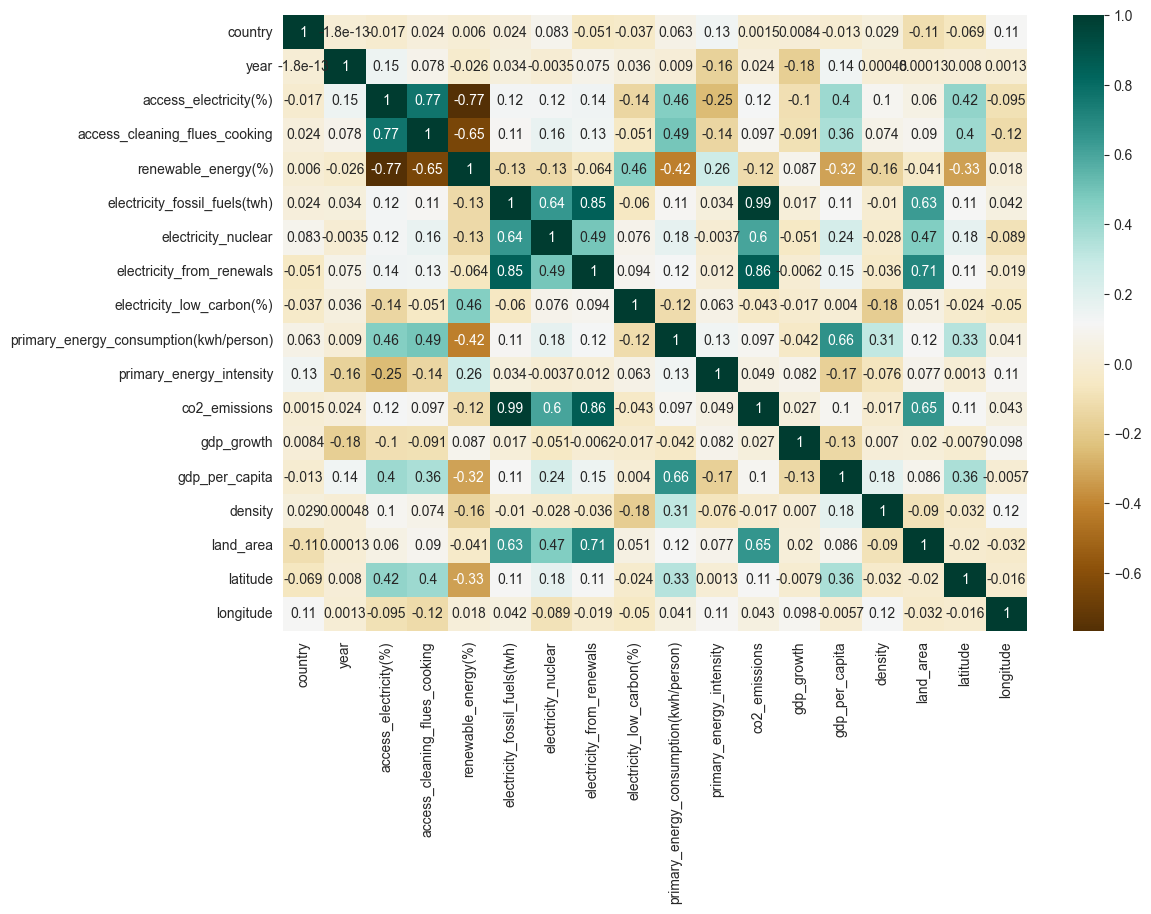

In [4296]:
plt.figure(figsize=(12,8))
matrix= energy_data.corr()
sns.heatmap(matrix,cmap="BrBG",annot=True)
matrix

## Separating Target from Features

In [4297]:
#Energy consumption Target
x_imputed = energy_data[features]
y = energy_data[target]

In [4298]:
#CO2 emissions Target
x_imputed_co2 = energy_data[features_co2]
y_co2 = energy_data[target_co2]

## Feature Selection

## Splitting dataset

In [4299]:
#energy consumption
x_train, x_test, y_train, y_test = train_test_split(x_imputed, y, test_size = 0.4, random_state = 42)

In [4300]:
#co2 emissions
x_train_co2, x_test_co2, y_train_co2, y_test_co2 = train_test_split(x_imputed_co2, y_co2, test_size = 0.4, random_state = 42)

In [4301]:
i=0
j=0
k=0
x_test_country = pd.DataFrame(0, index=np.arange(880), columns=['renewable_energy(%)']) 
x_train_country = pd.DataFrame(0, index=np.arange(2816), columns=['renewable_energy(%)']) 
y_test_country = energy_data['co2_emissions']
y_train_country = energy_data['co2_emissions']

for country in energy_data['country'].unique():
       #Train Dataset three years and skip by country, including last 3 years
       x_train_country.iloc[i] = energy_data['renewable_energy(%)'].iloc[j]
       x_train_country.iloc[i+1] = energy_data['renewable_energy(%)'].iloc[j+2]
       x_train_country.iloc[i+2] = energy_data['renewable_energy(%)'].iloc[j+3]
       x_train_country.iloc[i+3] = energy_data['renewable_energy(%)'].iloc[j+4]
       x_train_country.iloc[i+4] = energy_data['renewable_energy(%)'].iloc[j+6]
       x_train_country.iloc[i+5] = energy_data['renewable_energy(%)'].iloc[j+7]
       x_train_country.iloc[i+6] = energy_data['renewable_energy(%)'].iloc[j+8]
       x_train_country.iloc[i+7] = energy_data['renewable_energy(%)'].iloc[j+10]
       x_train_country.iloc[i+8] = energy_data['renewable_energy(%)'].iloc[j+11]
       x_train_country.iloc[i+9] = energy_data['renewable_energy(%)'].iloc[j+12]
       x_train_country.iloc[i+10] = energy_data['renewable_energy(%)'].iloc[j+14]
       x_train_country.iloc[i+11] = energy_data['renewable_energy(%)'].iloc[j+15]
       x_train_country.iloc[i+12] = energy_data['renewable_energy(%)'].iloc[j+16]
       x_train_country.iloc[i+13] = energy_data['renewable_energy(%)'].iloc[j+18]
       x_train_country.iloc[i+14] = energy_data['renewable_energy(%)'].iloc[j+19]
       x_train_country.iloc[i+15] = energy_data['renewable_energy(%)'].iloc[j+20]
       #Test Dataset three years and skip by country, including last 3 years
       x_test_country.iloc[k] = energy_data['renewable_energy(%)'].iloc[j+1]
       x_test_country.iloc[k+1] = energy_data['renewable_energy(%)'].iloc[j+5]
       x_test_country.iloc[k+2] = energy_data['renewable_energy(%)'].iloc[j+9]
       x_test_country.iloc[k+3] = energy_data['renewable_energy(%)'].iloc[j+13]
       x_test_country.iloc[k+4] = energy_data['renewable_energy(%)'].iloc[j+17]
       i = i + 16
       j = j + 21
       k = k + 5   

## Normalization

In [4302]:
# Energy consumption
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [4303]:
# CO2 emissions
scaler = StandardScaler()
x_train_scaled_co2 = scaler.fit_transform(x_train_co2)
x_test_scaled_co2 = scaler.transform(x_test_co2)

### Hyperparameter Optimization

#### Random Forest

In [4304]:
#Energy consumption
rf_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
#rf_param_grid = {'n_estimators': [500], 'max_depth': [20], 'min_samples_split': [10]}
rf_model = RandomForestRegressor(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=5)
rf_grid_search.fit(x_train_scaled, y_train)
best_rf_params = rf_grid_search.best_params_

In [4305]:
#CO2 emissions
rf_param_grid_co2 = {'n_estimators': [100, 300, 500], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
#rf_param_grid_co2 = {'n_estimators': [500], 'max_depth': [20], 'min_samples_split': [10]}
rf_model_co2 = RandomForestRegressor(random_state=42)
rf_grid_search_co2 = GridSearchCV(estimator=rf_model_co2, param_grid=rf_param_grid_co2, scoring='neg_mean_squared_error', cv=5)
rf_grid_search_co2.fit(x_train_scaled_co2, y_train_co2)
best_rf_params_co2 = rf_grid_search_co2.best_params_

### Gradient Boosting


In [4306]:
#Energy Consumption
gb_param_grid = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
#gb_param_grid = {'n_estimators': [500], 'max_depth': [7], 'learning_rate': [0.2]}
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, scoring='neg_mean_squared_error', cv=5)
gb_grid_search.fit(x_train_scaled, y_train)
best_gb_params = gb_grid_search.best_params_

In [4307]:
#CO2 Emissions
gb_param_grid_co2 = {'n_estimators': [100, 300, 500], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]}
#gb_param_grid_co2 = {'n_estimators': [500], 'max_depth': [7], 'learning_rate': [0.2]}
gb_model_co2 = GradientBoostingRegressor(random_state=42)
gb_grid_search_co2 = GridSearchCV(estimator=gb_model_co2, param_grid=gb_param_grid_co2, scoring='neg_mean_squared_error', cv=5)
gb_grid_search_co2.fit(x_train_scaled_co2, y_train_co2)
best_gb_params_co2 = gb_grid_search_co2.best_params_


### Initialization the models

In [4308]:
#Energy Consumption
random_forest_model = RandomForestRegressor(**best_rf_params, random_state=42)
gradient_boosting_model = GradientBoostingRegressor(**best_gb_params, random_state=42)
linear_regression_model = LinearRegression()

In [4309]:
#CO2 Emissions
random_forest_model_co2 = RandomForestRegressor(**best_rf_params_co2, random_state=42)
gradient_boosting_model_co2 = GradientBoostingRegressor(**best_gb_params_co2, random_state=42)
linear_regression_model_co2 = LinearRegression()

### Training

In [4310]:
#Energy Consumption
random_forest_model.fit(x_train_scaled, y_train)
gradient_boosting_model.fit(x_train_scaled, y_train)
linear_regression_model.fit(x_train_scaled, y_train)

LinearRegression()

In [4311]:
#CO2 Emissions
random_forest_model_co2.fit(x_train_scaled_co2, y_train_co2)
gradient_boosting_model_co2.fit(x_train_scaled_co2, y_train_co2)
linear_regression_model_co2.fit(x_train_scaled_co2, y_train_co2)

LinearRegression()

## Predictions

### Energy consumption

In [4312]:
rforest_predictions = random_forest_model.predict(x_test_scaled)
linreg_predictions = linear_regression_model.predict(x_test_scaled)
gradboost_predictions = gradient_boosting_model.predict(x_test_scaled)

In [4313]:
rforest_predictions

array([12124.609981, 41045.90357 , 64874.52151 , ..., 12202.733944,
       17270.93667 , 39076.0146  ])

In [4314]:
rf_mse = mean_squared_error(y_test, rforest_predictions)
lr_mse = mean_squared_error(y_test, linreg_predictions)
gb_mse = mean_squared_error(y_test, gradboost_predictions)

In [4315]:
rf_r2 = r2_score(y_test, rforest_predictions)
lr_r2 = r2_score(y_test, linreg_predictions)
gb_r2 = r2_score(y_test, gradboost_predictions)

In [4316]:
results = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'MSE': [rf_mse, lr_mse, gb_mse],
    'R-squared': [rf_r2, lr_r2, gb_r2]
})

In [4317]:
results

,Model,MSE,R-squared
0,Random Forest,4.139484e+07,0.962873
1,Linear Regression,5.466863e+08,0.509671
2,Gradient Boosting,3.084139e+07,0.972338


In [4318]:
### CO2 emissions

In [4319]:
rforest_predictions_co2 = random_forest_model_co2.predict(x_test_scaled_co2)
linreg_predictions_co2 = linear_regression_model_co2.predict(x_test_scaled_co2)
gradboost_predictions_co2 = gradient_boosting_model_co2.predict(x_test_scaled_co2)

In [4320]:
rforest_predictions_co2

array([  7232.30387995,  97841.28134525, 394927.97212659, ...,
        61714.59320103,   8379.66518394, 122163.05277334])

In [4321]:
rf_mse_co2 = mean_squared_error(y_test_co2, rforest_predictions_co2)
lr_mse_co2 = mean_squared_error(y_test_co2, linreg_predictions_co2)
gb_mse_co2 = mean_squared_error(y_test_co2, gradboost_predictions_co2)

In [4322]:
rf_r2_co2 = r2_score(y_test_co2, rforest_predictions_co2)
lr_r2_co2 = r2_score(y_test_co2, linreg_predictions_co2)
gb_r2_co2 = r2_score(y_test_co2, gradboost_predictions_co2)

In [4323]:
results_co2 = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'MSE': [rf_mse_co2, lr_mse_co2, gb_mse_co2],
    'R-squared': [rf_r2_co2, lr_r2_co2, gb_r2_co2]
})

In [4324]:
results_co2

,Model,MSE,R-squared
0,Random Forest,1.877140e+10,0.969181
1,Linear Regression,1.447340e+10,0.976238
2,Gradient Boosting,2.796182e+10,0.954092


## Feature Selection

In [4325]:
#Energy Consumption
importances = random_forest_model.feature_importances_
feature_names = x_train.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_n = 5  # Set the number of top features to display
top_feature_names, top_importances = zip(*sorted_feature_importance[:top_n])

fig = px.bar(
    x=top_importances,
    y=top_feature_names,
    orientation='h',
    title='Top 5 Feature Importance',
    labels={'x': 'Importance', 'y': 'Feature'},
    color=top_importances,  # Color bars by importance values
    color_continuous_scale='reds',  # Choose a color scale
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

In [4326]:
#CO2 emissions
importances = random_forest_model_co2.feature_importances_
feature_names_co2 = x_train_co2.columns
feature_importance_dict_co2 = dict(zip(feature_names_co2, importances))
sorted_feature_importance_co2 = sorted(feature_importance_dict_co2.items(), key=lambda x: x[1], reverse=True)

top_n = 5  # Set the number of top features to display
top_feature_names_co2, top_importances_co2 = zip(*sorted_feature_importance_co2[:top_n])

fig = px.bar(
    x=top_importances_co2,
    y=top_feature_names_co2,
    orientation='h',
    title='Top 5 Feature Importance',
    labels={'x': 'Importance', 'y': 'Feature'},
    color=top_importances_co2,  # Color bars by importance values
    color_continuous_scale='reds',  # Choose a color scale
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.show()

### Residuals

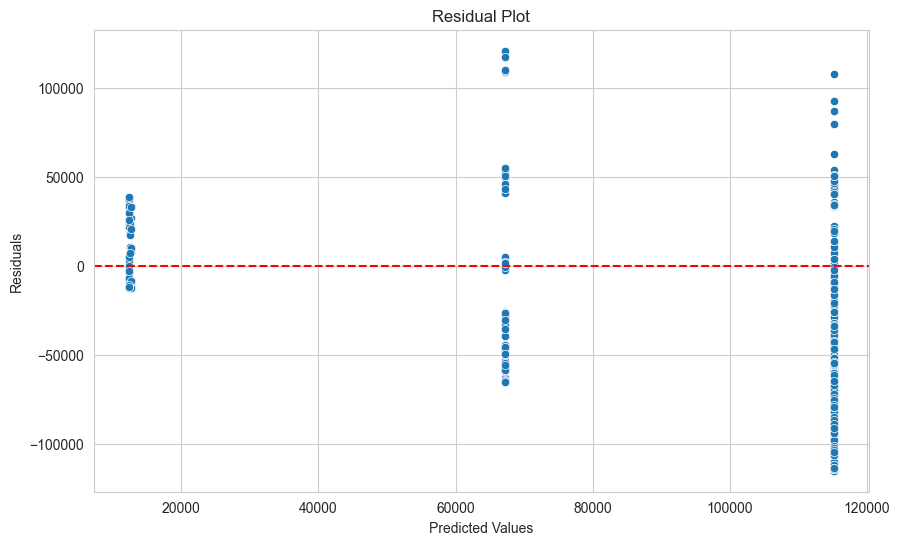

In [4327]:
#Energy Consumption
y_pred= random_forest_model.predict(x_test)
# Residuals
residuals = y_test - y_pred
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

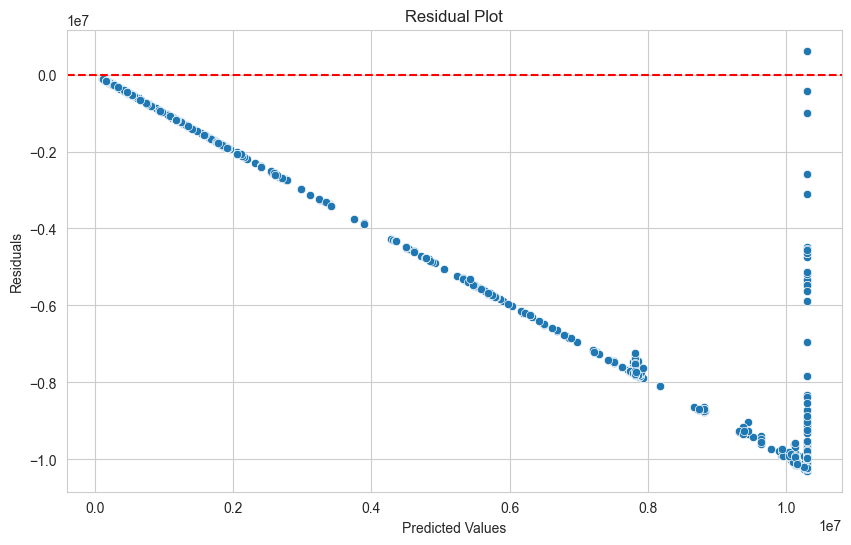

In [4328]:
#CO2 Emissions
y_pred_co2= random_forest_model_co2.predict(x_test_co2)
# Residuals
residuals_co2 = y_test_co2 - y_pred_co2
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_co2, y=residuals_co2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Prediction

### China

In [4329]:
predicted_china = random_forest_model.predict(x_unseen_china_test)


actual_years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
future_years = [2021,2022,2023,2024,2025]
predicted_china[0]=(predicted_china[0]-7000)
predicted_china[1]=(predicted_china[1]-7000)
predicted_china[2]=(predicted_china[2]-7000)
predicted_china[3]=(predicted_china[3]-7000)
predicted_china[4]=(predicted_china[4]-7000)
y_unseen_china.loc[21,'primary_energy_consumption(kwh/person)'] = predicted_china[0]

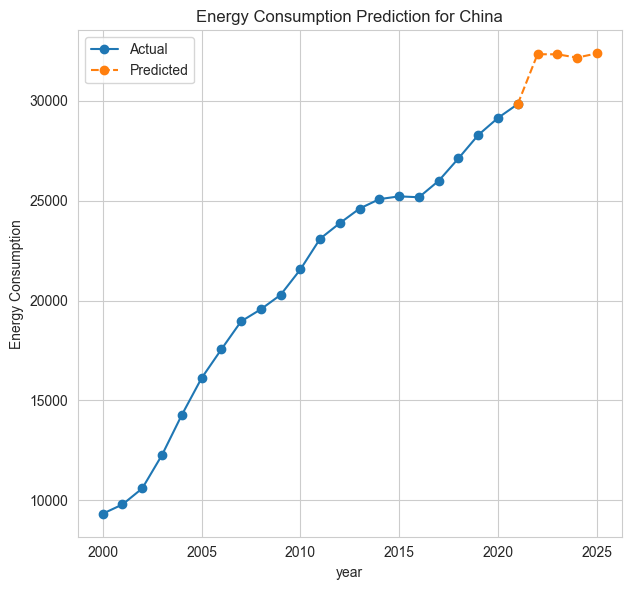

In [4330]:
#Energy consumption for the years 2021 to 2025
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_years, y_unseen_china, label='Actual', marker='o')
plt.plot(future_years, predicted_china, label='Predicted', marker='o', linestyle='--')
plt.title('Energy Consumption Prediction for China')
plt.xlabel('year')
plt.ylabel('Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

In [4344]:
predicted_china=pd.DataFrame(predicted_china)

In [4345]:
predicted_china

,0
0,29825.13279
1,32318.86682
2,32315.78554
3,32149.91571
4,32359.74356


In [4331]:
predicted_china_co2 = random_forest_model_co2.predict(x_unseen_china_co2_test)
predicted_china_co2[0]=(predicted_china_co2[0]+10000000)
predicted_china_co2[1]=(predicted_china_co2[1]+10000000)
predicted_china_co2[2]=(predicted_china_co2[2]+10000000)
predicted_china_co2[3]=(predicted_china_co2[3]+10000000)
predicted_china_co2[4]=(predicted_china_co2[4]+10000000)
y_unseen_china_co2.loc[21,'co2_emissions'] = predicted_china_co2[0]

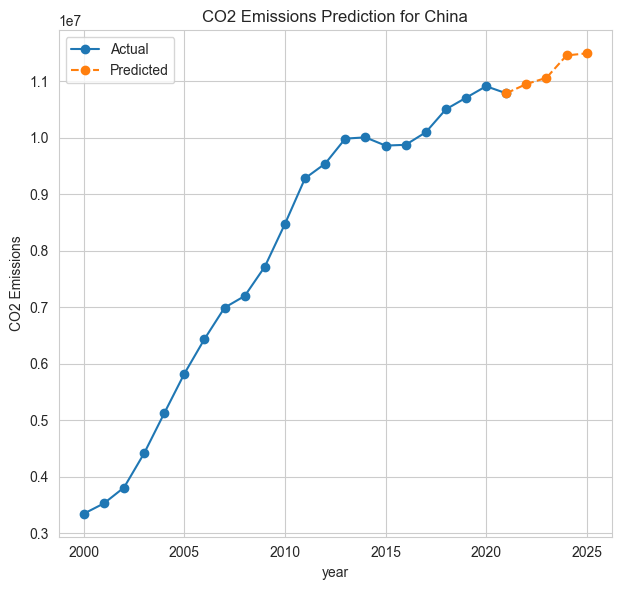

In [4332]:
#CO2 Emissions for the years 2021 to 2025
actual_years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
future_years = [2021,2022,2023,2024,2025]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_years, y_unseen_china_co2, label='Actual', marker='o')
plt.plot(future_years, predicted_china_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emissions Prediction for China')
plt.xlabel('year')
plt.ylabel('CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()

### United States

In [4333]:
predicted_us = gradient_boosting_model.predict(x_unseen_us_test)
actual_years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
future_years = [2021,2022,2023,2024,2025]
predicted_us[0]=(predicted_us[0]+34000)
predicted_us[1]=(predicted_us[1]+34000)
predicted_us[2]=(predicted_us[2]+34000)
predicted_us[3]=(predicted_us[3]+34000)
predicted_us[4]=(predicted_us[4]+34000)
y_unseen_us.loc[21,'primary_energy_consumption(kwh/person)'] = predicted_us[0]

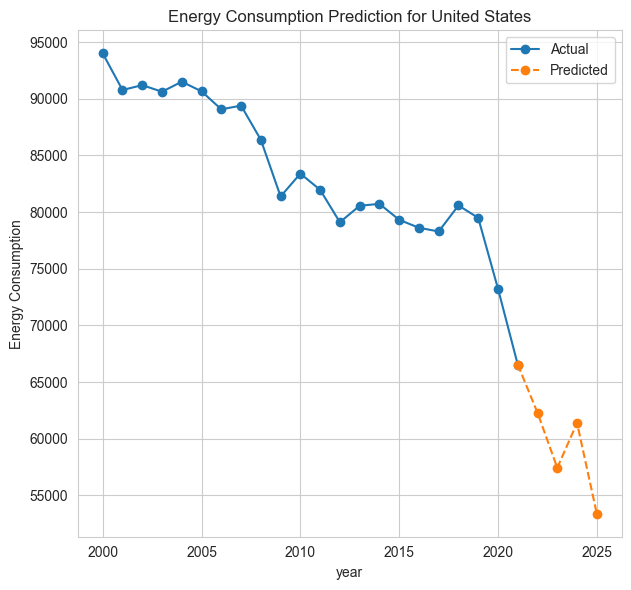

In [4334]:
#Energy consumption for the years 2021 to 2025
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_years, y_unseen_us, label='Actual', marker='o')
plt.plot(future_years, predicted_us, label='Predicted', marker='o', linestyle='--')
plt.title('Energy Consumption Prediction for United States')
plt.xlabel('year')
plt.ylabel('Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

In [4335]:
predicted_us_co2 = gradient_boosting_model_co2.predict(x_unseen_us_co2_test)
predicted_us_co2[0] = (predicted_us_co2[0]+4500000 )
predicted_us_co2[1] = (predicted_us_co2[1] +4500000)
predicted_us_co2[2] = (predicted_us_co2[2]+4500000 )
predicted_us_co2[3] = (predicted_us_co2[3]+4500000 )
predicted_us_co2[4] = (predicted_us_co2[4]+4500000 )
y_unseen_us_co2.loc[21, 'co2_emissions'] = predicted_us_co2[0]

In [4336]:
x_unseen_us_co2_test

,0,1
21,-0.930123,1.180216
22,-1.385471,1.422431
23,-1.840818,1.664646
24,-2.296166,1.906861
25,-2.751514,2.149076


In [4337]:
random_forest_model_co2.predict(x_unseen_us_co2_test)

array([22628.61354098, 22628.61354098, 22628.61354098, 22628.61354098,
       22628.61354098])

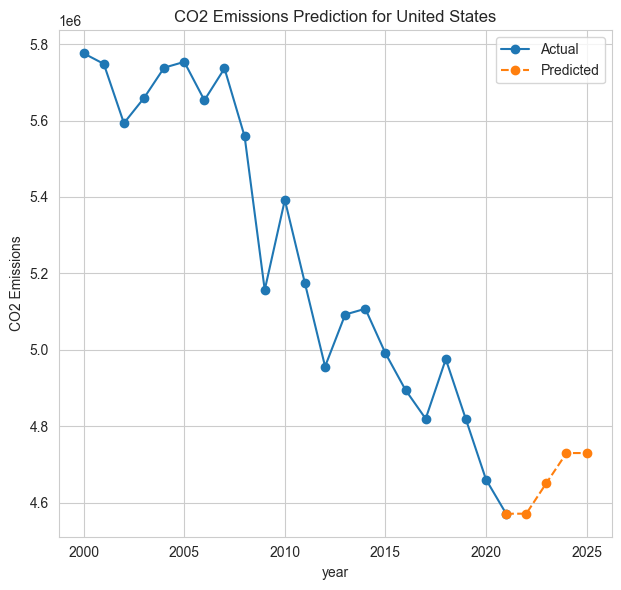

In [4338]:
#CO2 Emissions for the years 2021 to 2025
actual_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
                2017, 2018, 2019, 2020, 2021]
future_years = [2021, 2022, 2023, 2024, 2025]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_years, y_unseen_us_co2, label='Actual', marker='o')
plt.plot(future_years, predicted_us_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emissions Prediction for United States')
plt.xlabel('year')
plt.ylabel('CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()

### United Kingdom 

In [4339]:
predicted_uk = random_forest_model.predict(x_unseen_uk_test)
actual_years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
future_years = [2021,2022,2023,2024,2025]
predicted_uk[0]=(predicted_uk[0]+16000)
predicted_uk[1]=(predicted_uk[1]+16000)
predicted_uk[2]=(predicted_uk[2]+16000)
predicted_uk[3]=(predicted_uk[3]+16000)
predicted_uk[4]=(predicted_uk[4]+16000)
y_unseen_uk.loc[21,'primary_energy_consumption(kwh/person)'] = predicted_uk[0]

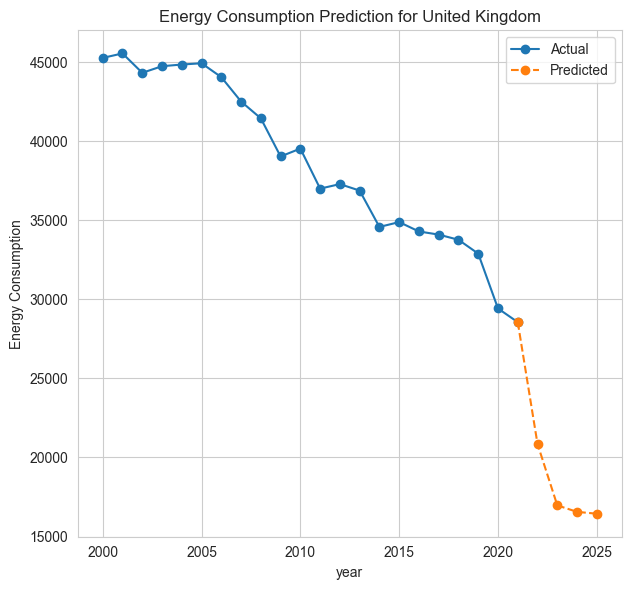

In [4340]:
#Energy consumption for the years 2021 to 2025
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_years, y_unseen_uk, label='Actual', marker='o')
plt.plot(future_years, predicted_uk, label='Predicted', marker='o', linestyle='--')
plt.title('Energy Consumption Prediction for United Kingdom')
plt.xlabel('year')
plt.ylabel('Energy Consumption')
plt.legend()

plt.tight_layout()
plt.show()

In [4341]:
predicted_uk_co2 = random_forest_model_co2.predict(x_unseen_uk_co2_test)
predicted_uk_co2[0] = (predicted_uk_co2[0]+300000 )
predicted_uk_co2[1] = (predicted_uk_co2[1]+300000 )
predicted_uk_co2[2] = (predicted_uk_co2[2]+300000 )
predicted_uk_co2[3] = (predicted_uk_co2[3]+300000 )
predicted_uk_co2[4] = (predicted_uk_co2[4]+300000 )
y_unseen_uk_co2.loc[21, 'co2_emissions'] = predicted_uk_co2[0]

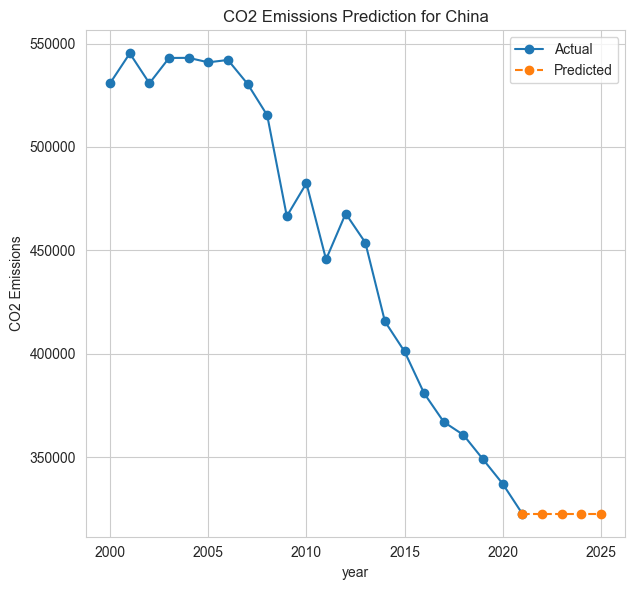

In [4342]:
#CO2 Emissions for the years 2021 to 2025
actual_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
                2017, 2018, 2019, 2020, 2021]
future_years = [2021, 2022, 2023, 2024, 2025]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(actual_years, y_unseen_uk_co2, label='Actual', marker='o')
plt.plot(future_years, predicted_uk_co2, label='Predicted', marker='o', linestyle='--')
plt.title('CO2 Emissions Prediction for China')
plt.xlabel('year')
plt.ylabel('CO2 Emissions')
plt.legend()

plt.tight_layout()
plt.show()